In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib qt5

In [8]:
paths = '/home/czey/generative_inpainting/CTarms_201116/npytodoTPS/testC'
patient_names = sorted(os.listdir(paths))
for patient_name in patient_names:
    patient_path = os.path.join(paths, patient_name)
    npy_names = sorted(os.listdir(patient_path))
    for i, npy_name in enumerate(npy_names):
        npy_path = os.path.join(patient_path, npy_name)
#         print(i)
        if i % 5 != 0:
            os.remove(npy_path)
        

In [5]:
1 % 5 != 0

True

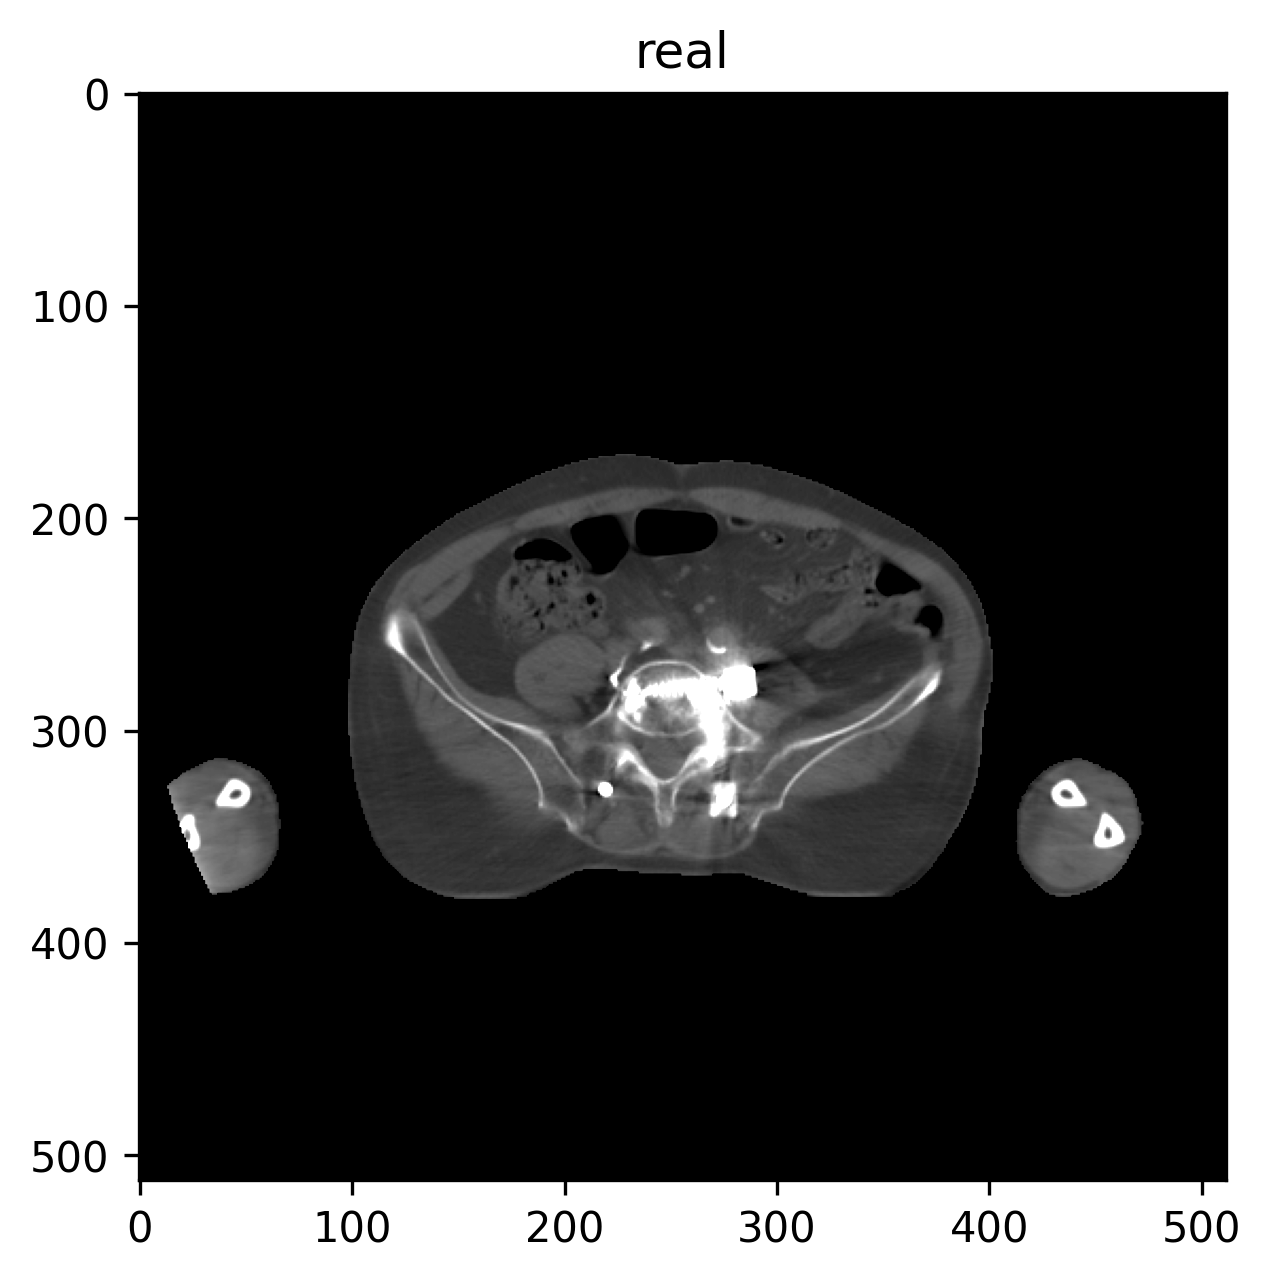

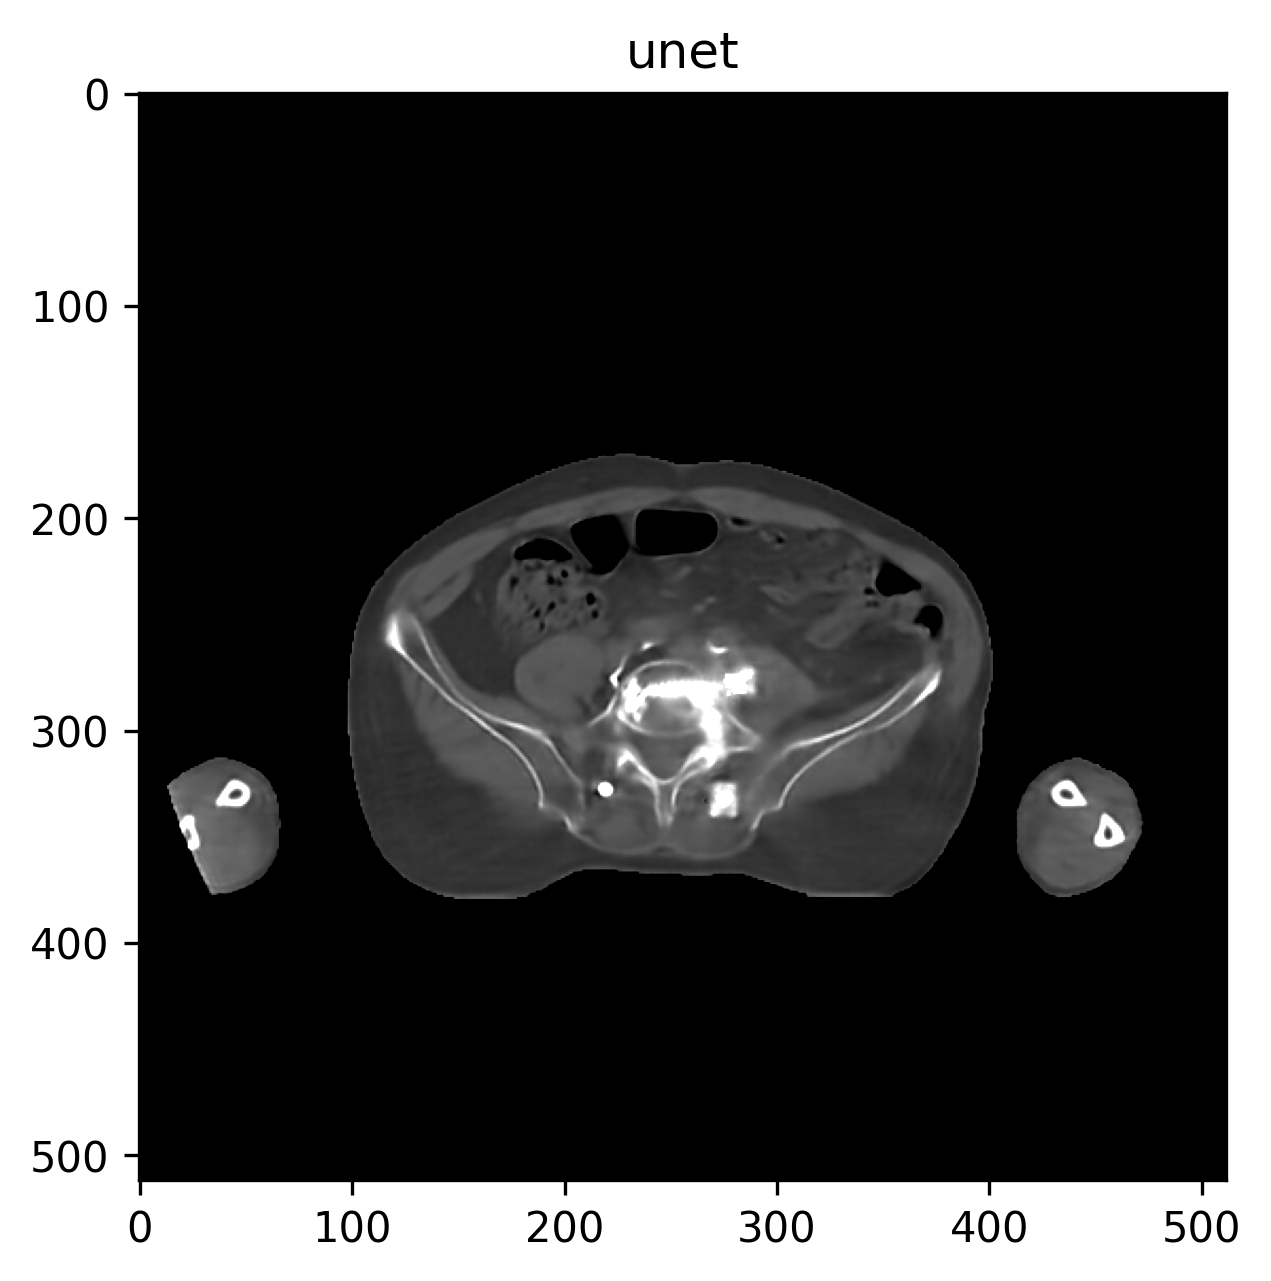

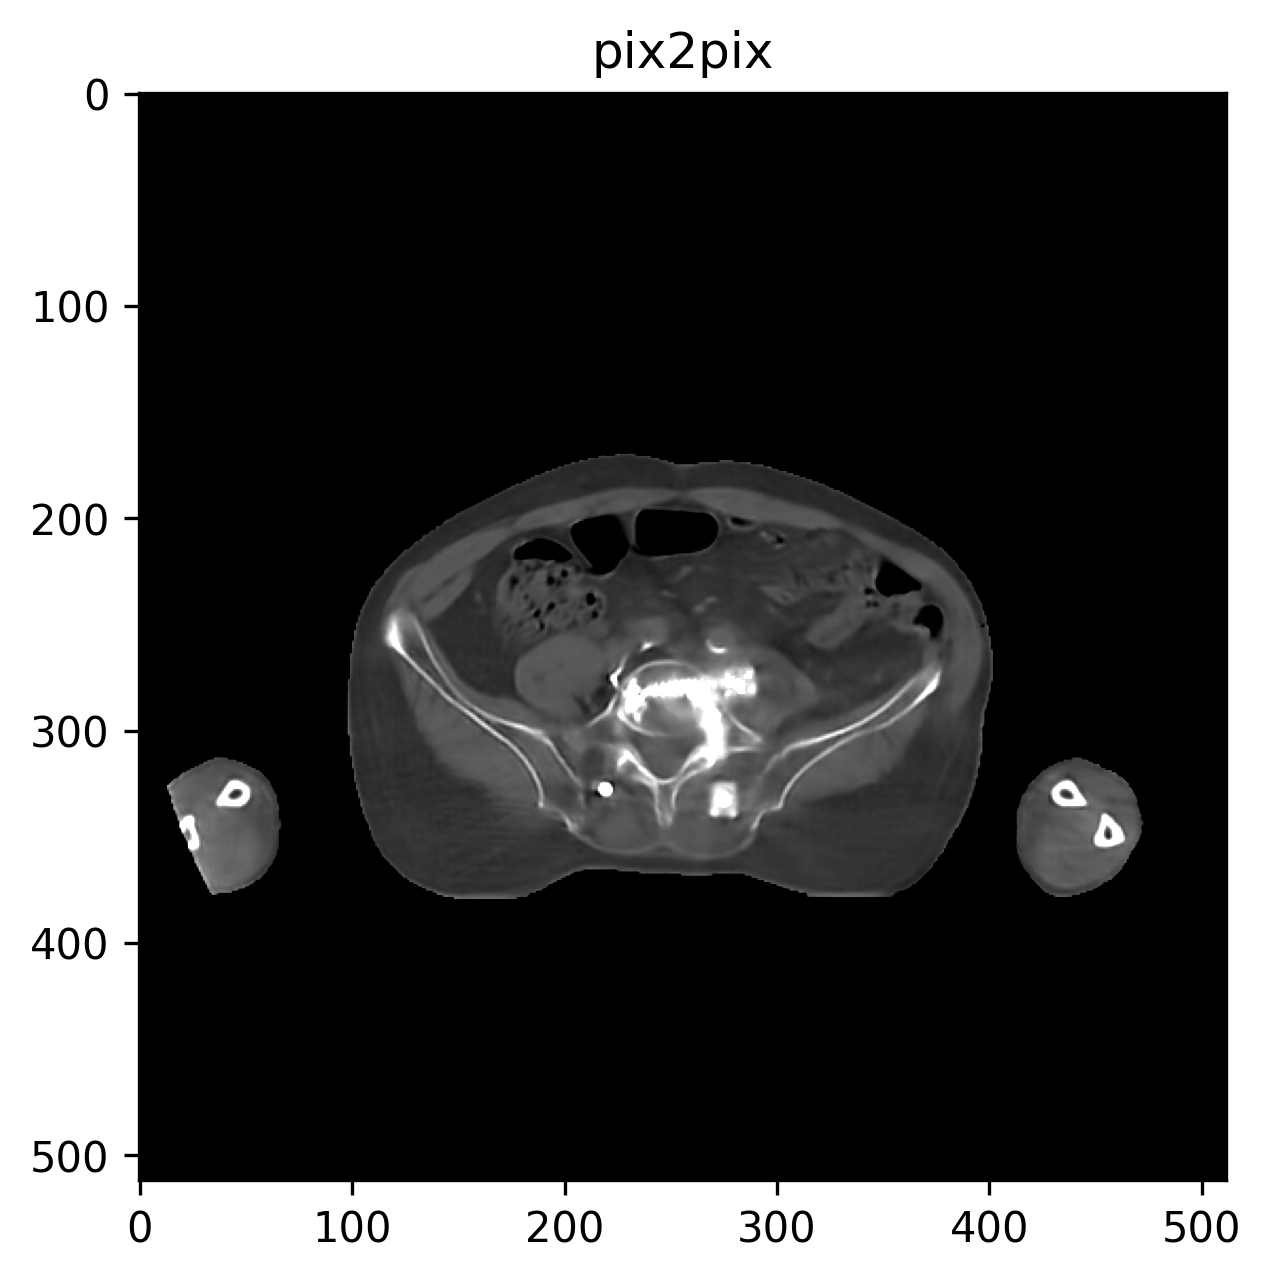

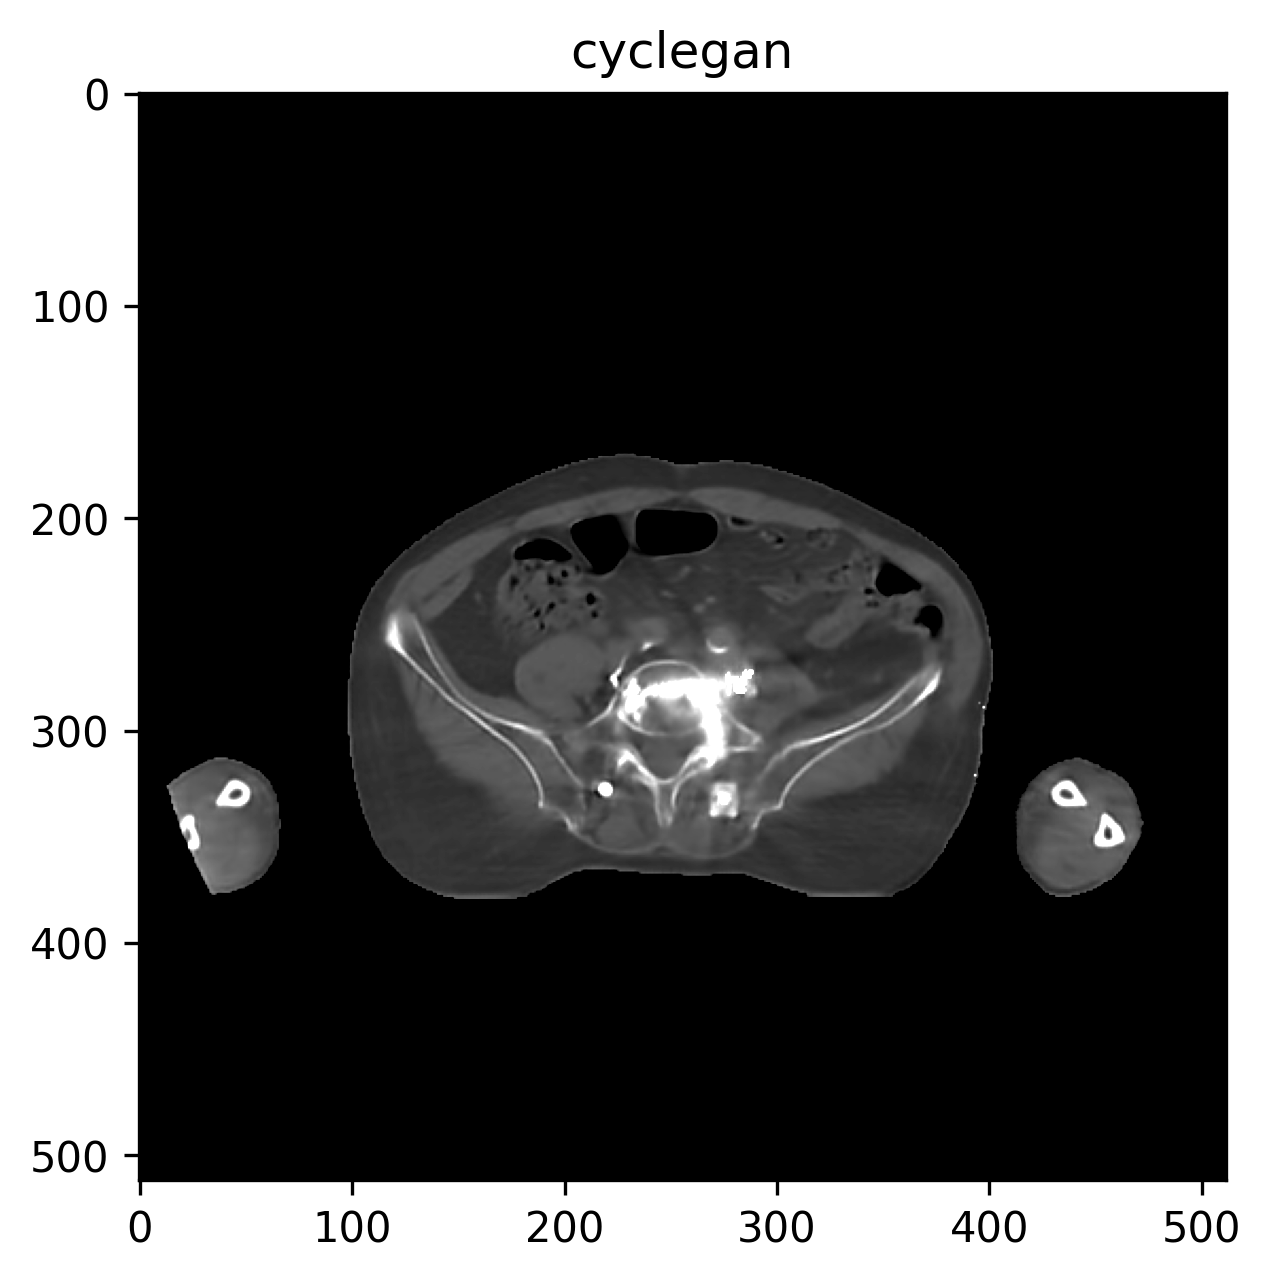

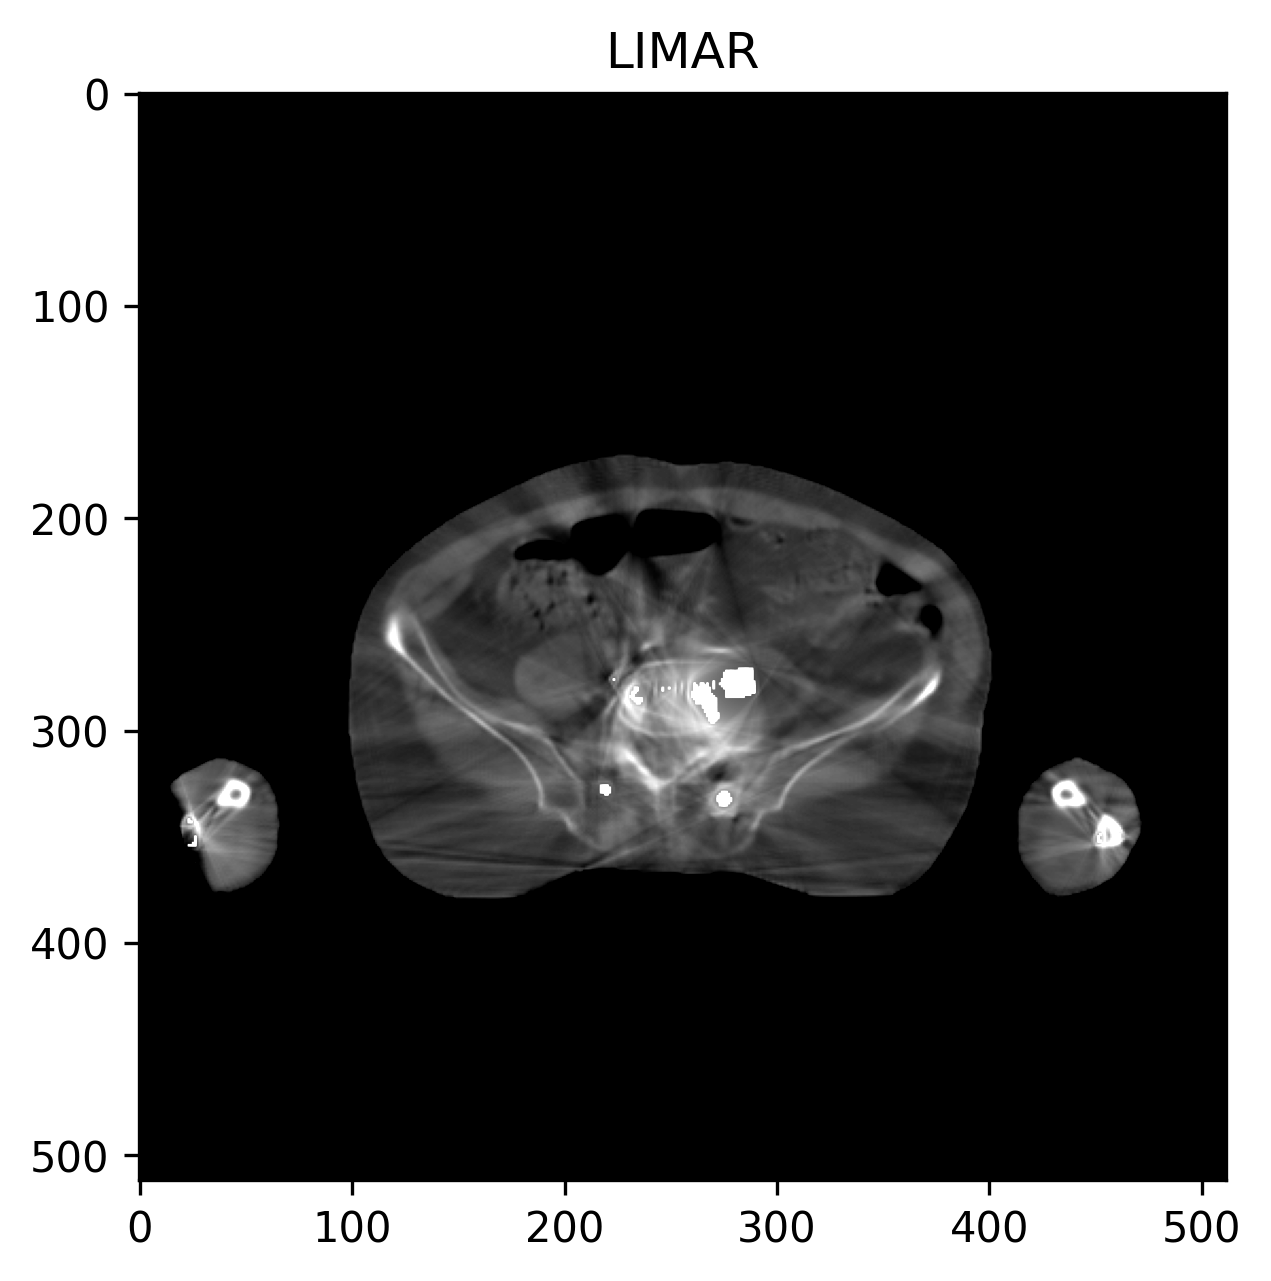

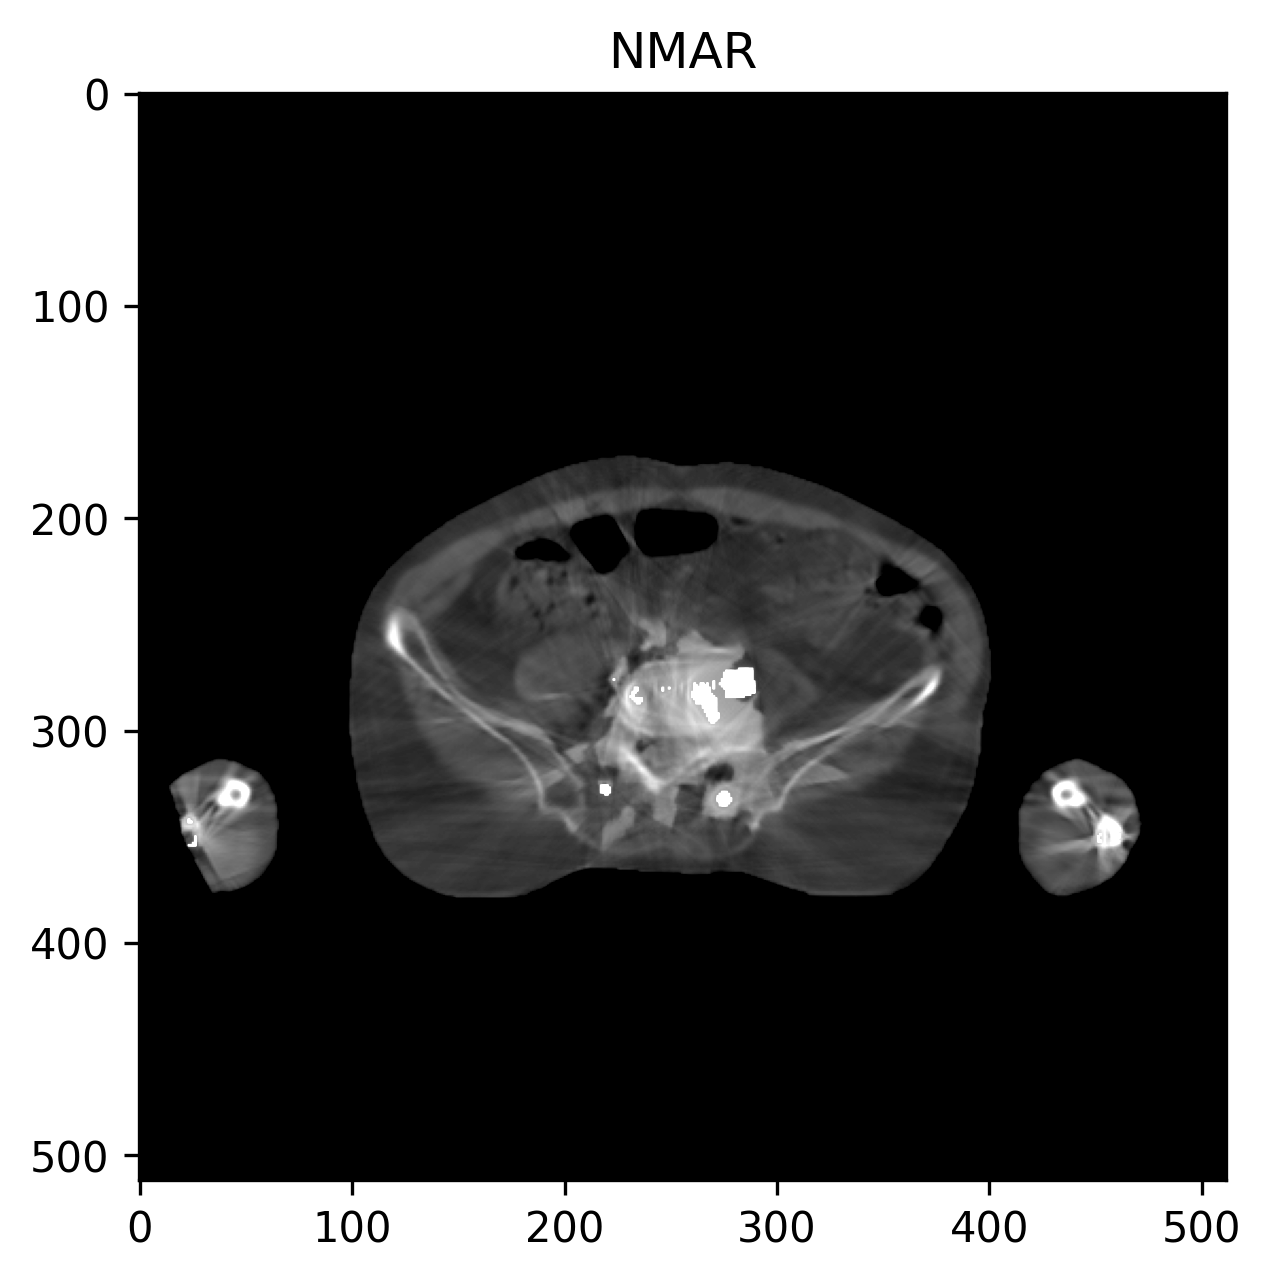

In [89]:
i=1080
realA_0 = np.load('/media/czey/Elements/0_test_validation_v2/validation_unet/Y201011/'+str(i)+'realA.npy')
fakeB_0 = np.load('/media/czey/Elements/0_test_validation_v2/validation_unet/Y201011/'+str(i)+'fakeB.npy')
fakeB_1 = np.load('/media/czey/Elements/0_test_validation_v2/validation_pix2pix/Y201011/'+str(i)+'fakeB.npy')
fakeB_2 = np.load('/media/czey/Elements/0_test_validation_v2/validation_cycle_gan/Y201011/'+str(i)+'fakeB.npy')
fakeB_3 = np.load('/media/czey/Elements/0_test_validation_v2/validation_LIMAR/Y201011/'+str(i)+'fakeB.npy')
fakeB_4 = np.load('/media/czey/Elements/0_test_validation_v2/validation_NMAR/Y201011/'+str(i)+'fakeB.npy')

realA_0 = np.uint16((realA_0+1)/2*4095)
fakeB_0 = np.uint16((fakeB_0+1)/2*4095)
fakeB_1 = np.uint16((fakeB_1+1)/2*4095)
fakeB_2 = np.uint16((fakeB_2+1)/2*4095)

fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(realA_0[0,0,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('real')
plt.savefig('visual_result_truepatient/%d_real.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(fakeB_0[0,0,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('unet')
plt.savefig('visual_result_truepatient/%d_unet.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(fakeB_1[0,0,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('pix2pix')
plt.savefig('visual_result_truepatient/%d_pix2pix.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(fakeB_2[0,0,:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('cyclegan')
plt.savefig('visual_result_truepatient/%d_cyclegan.png' % i, bbox_inches='tight')
# 
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(fakeB_3[:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('LIMAR')
plt.savefig('visual_result_truepatient/%d_LIMAR.png' % i, bbox_inches='tight')

fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=300)
plt.imshow(fakeB_4[:,:],vmin=-300+1024,vmax=700+1024,cmap='gray')
plt.title('NMAR')
plt.savefig('visual_result_truepatient/%d_NMAR.png' % i, bbox_inches='tight')

In [16]:
fig,ax=plt.subplots()
plt.imshow(realB_0[0,0,:,:]-realA_0[0,0,:,:], vmin=-1, vmax=1, cmap='gray')
plt.title('realB_0-reakA_0')
plt.show()

fig,ax=plt.subplots()
plt.imshow(fakeB_0[0,0,:,:]-realB_0[0,0,:,:], vmin=-1, vmax=1, cmap='gray')
plt.title('fakeB_0-realB_0')
plt.show()

fig,ax=plt.subplots()
plt.imshow(fakeB_0[0,0,:,:]-realA_0[0,0,:,:], vmin=-1, vmax=1, cmap='gray')
plt.title('fakeB_0-realA_0')
plt.show()

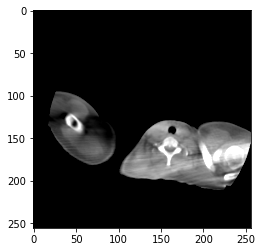

In [69]:
img = np.load('real_a_0.npy')
img_CT = (img[0,0,:,:]+1)/2 * 2500
plt.imshow(img_CT, vmin=500, vmax=1500, cmap='gray')
plt.show()

In [36]:
import cv2

In [37]:
img = cv2.imread('1002.png', cv2.IMREAD_UNCHANGED)
img.shape

(512, 512)

In [35]:
base_path = 'datasets/glg_pix2pix/train'
outputA_path = 'datasets/glg_pix2pix/trainA'
outputB_path = 'datasets/glg_pix2pix/trainB'
for name in os.listdir(base_path):
    name_path = os.path.join(base_path, name)
    imgAB = np.load(name_path)
    imgA = imgAB[:, :256]
    imgB = imgAB[:, 256:]
    np.save(os.path.join(outputA_path, name), imgA)
    np.save(os.path.join(outputB_path, name), imgB)
    

In [32]:
imgAB.shape

(256, 512)

In [71]:
img2 = cv2.resize(img[:,:256], (256,256))
plt.imshow(img2, vmin=0, vmax=1500, cmap='gray')
plt.show()

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/resize.cpp:3687: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [6]:
img2.shape

(256, 256)

In [13]:
img2.max()

0

In [28]:
img2 = img.rescale([256,256])

ValueError: cannot resize this array: it does not own its data

In [29]:
dir(img)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e